In [1]:
import pandas as pd
ds = pd.read_csv('winequality-red.csv')

In [2]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
x_data = ds.drop('quality', axis=1)
y_data = ds['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [4]:
x_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

scaler_StandardScaler = StandardScaler()
X_scaled_StandardScaler = scaler_StandardScaler.fit_transform(x_data)



In [7]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=50) 

In [8]:
x_train_selected_StandardScaler = scaler_StandardScaler.fit_transform(x_train)
x_test_selected_StandardScaler = scaler_StandardScaler.transform(x_test)

In [9]:
from sklearn.naive_bayes import GaussianNB

GaussianNB_classifier = GaussianNB()

GaussianNB_classifier.fit(x_train_selected_StandardScaler, y_train)

GaussianNB()

In [10]:
y_pred_StandardScaler = GaussianNB_classifier.predict(x_test_selected_StandardScaler)

In [11]:
from sklearn.metrics import accuracy_score

accuracy_StandardScaler = accuracy_score(y_test, y_pred_StandardScaler) * 100

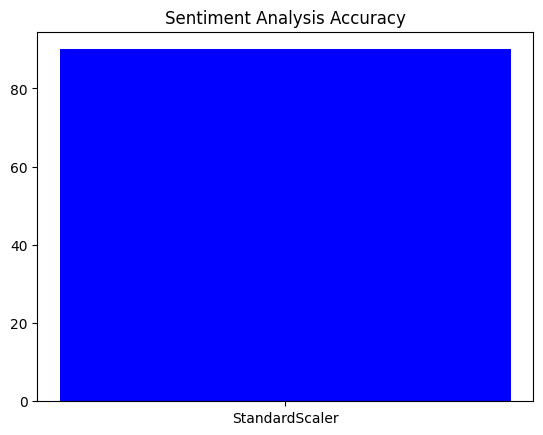

accuracy StandardScaler:90.0 %


In [12]:
import matplotlib.pyplot as plt

plt.bar(['StandardScaler'], [accuracy_StandardScaler], color=['blue'])
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy StandardScaler:{accuracy_StandardScaler} %')

In [13]:
from sklearn.ensemble import RandomForestClassifier


RandomForest_classifier = RandomForestClassifier()

RandomForest_classifier.fit(x_train_selected_StandardScaler, y_train)

RandomForestClassifier()

In [14]:
y_pred_StandardScaler_l = RandomForest_classifier.predict(x_test_selected_StandardScaler)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_StandardScaler = accuracy_score(y_test, y_pred_StandardScaler_l) * 100

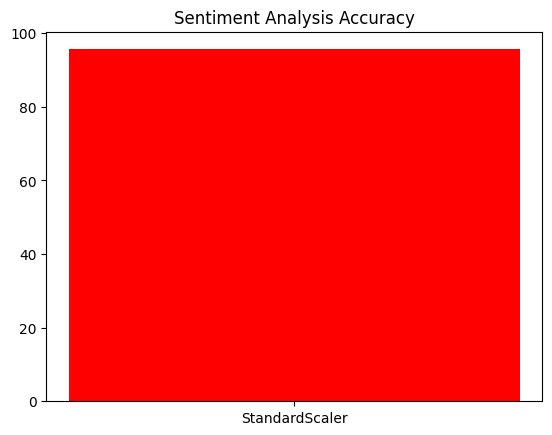

accuracy StandardScaler:95.625 %


In [16]:
import matplotlib.pyplot as plt

plt.bar(['StandardScaler'], [accuracy_StandardScaler], color=['red'])
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy StandardScaler:{accuracy_StandardScaler} %')

In [17]:
import pickle

# Save models and scaler
with open('gnb_model.pkl', 'wb') as f:
    pickle.dump(GaussianNB_classifier, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(RandomForest_classifier, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler_StandardScaler, f)

with open('inputs.pkl', 'wb') as f:
    pickle.dump(x_data.columns.tolist(), f)